In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn


In [10]:
from sklearn.datasets import make_circles

n_samples = 1000

X , y = make_circles(n_samples=n_samples,
                     noise=0.03,
                     factor=0.5, 
                     random_state=42) 


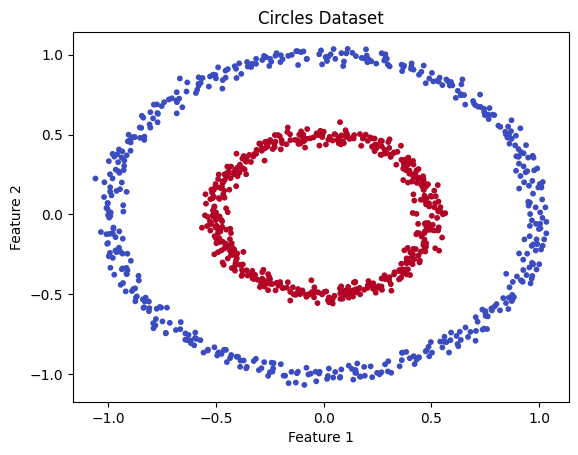

In [11]:
#visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=10)
plt.title("Circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [12]:
len(X), len(y)

(1000, 1000)

In [13]:
print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"first 5 samples of X: {X[:5]}")

X shape: (1000, 2), y shape: (1000,)
first 5 samples of X: [[ 0.46463176  0.15322829]
 [-0.4601531   0.10446773]
 [-0.51775752  0.13568206]
 [-0.26599694  0.42143465]
 [ 0.44220765 -0.89672343]]


In [15]:
X

array([[ 0.46463176,  0.15322829],
       [-0.4601531 ,  0.10446773],
       [-0.51775752,  0.13568206],
       ...,
       [-0.08068597, -0.51532565],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]], shape=(1000, 2))

In [16]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [17]:
#Make DataFrame
import pandas as pd

In [18]:
circles = pd.DataFrame({ "X1": X[:, 0], 
                         "X2": X[:, 1], 
                         "y": y})
circles.head(10)

,X1,X2,y
0,0.464632,0.153228,1
1,-0.460153,0.104468,1
2,-0.517758,0.135682,1
3,-0.265997,0.421435,1
4,0.442208,-0.896723,0
5,-0.294288,0.440548,1
6,-0.009879,0.503372,1
7,0.475507,0.098968,1
8,-0.109409,-0.499499,1
9,-0.121486,1.021509,0


In [19]:
# check input and output shapes
print(f"Input shape: {X.shape}, Output shape: {y.shape}")


Input shape: (1000, 2), Output shape: (1000,)


In [20]:
type(X)

numpy.ndarray

In [23]:
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

C:\Users\Kata\AppData\Local\Temp\ipykernel_20328\2540352491.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)
C:\Users\Kata\AppData\Local\Temp\ipykernel_20328\2540352491.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


In [24]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [25]:
X[:5], y[:5]

(tensor([[ 0.4646,  0.1532],
         [-0.4602,  0.1045],
         [-0.5178,  0.1357],
         [-0.2660,  0.4214],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [30]:
torch.manual_seed(42)

In [31]:
#slit the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test
.shape}")
# --- IGNORE ---
print(f"First 5 samples of X_train: {X_train[:5]}")
print(f"First 5 samples of y_train: {y_train[:5]}")

X_train shape: torch.Size([800, 2]), y_train shape: torch.Size([800])
X_test shape: torch.Size([200, 2]), y_test shape: torch.Size([200])
First 5 samples of X_train: tensor([[ 0.4221, -0.2797],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1030,  0.5063]])
First 5 samples of y_train: tensor([1., 0., 0., 0., 1.])


In [34]:
print(f"Training set size: {len(X_train)}, {len(y_train)}")
print(f"Test set size: {len(X_test)}, {len(y_test)}")
print(f"Total dataset size: {len(X)}, {len(y)}")

Training set size: 800, 800
Test set size: 200, 200
Total dataset size: 1000, 1000


Training set size: 800, 800
Test set size: 200, 200
Total dataset size: 1000, 1000



In [46]:
# Building a model to classify the circles dataset

#check for gpu availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

class CircleClassifier(nn.Module):
    def __init__(self):
        super(CircleClassifier, self).__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=1)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.activation(x)
        x = self.layer_2(x)
        x = self.output_activation(x)
        return x

# Instantiate the model
model = CircleClassifier().to(device)
# Print the model architecture
print(model)


Using device: cpu
CircleClassifier(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
  (activation): ReLU()
  (output_activation): Sigmoid()
)


Epoch [0/2000], Loss: 0.0016
Epoch [100/2000], Loss: 0.0002
Epoch [200/2000], Loss: 0.0001
Epoch [300/2000], Loss: 0.0000
Epoch [400/2000], Loss: 0.0000
Epoch [500/2000], Loss: 0.0000
Epoch [600/2000], Loss: 0.0000
Epoch [700/2000], Loss: 0.0000
Epoch [800/2000], Loss: 0.0000
Epoch [900/2000], Loss: 0.0000
Epoch [1000/2000], Loss: 0.0000
Epoch [1100/2000], Loss: 0.0000
Epoch [1200/2000], Loss: 0.0000
Epoch [1300/2000], Loss: 0.0000
Epoch [1400/2000], Loss: 0.0000
Epoch [1500/2000], Loss: 0.0000
Epoch [1600/2000], Loss: 0.0000
Epoch [1700/2000], Loss: 0.0000
Epoch [1800/2000], Loss: 0.0000
Epoch [1900/2000], Loss: 0.0000


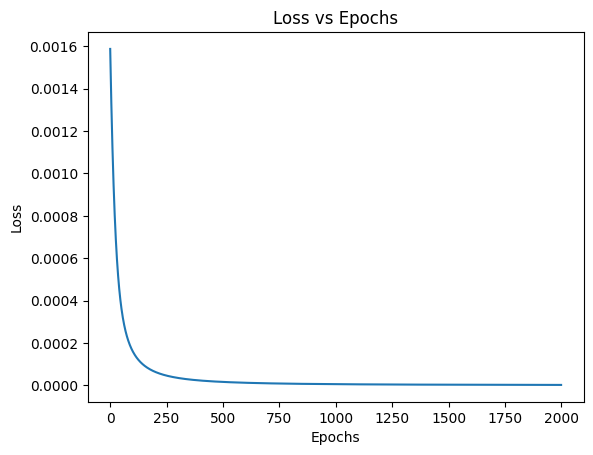

In [48]:
#train the model
# Define loss function and optimizer
loss_fn = nn.BCELoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)


# Training loop

num_epochs = 2000
#loss array to store loss values
loss_values = []

for epoch in range(num_epochs):
    # Forward pass
    model.train()
    X_train_tensor = X_train.to(device)
    y_train_tensor = y_train.to(device)
    
    y_pred = model(X_train_tensor).squeeze()
    
    # Compute loss
    loss = loss_fn(y_pred, y_train_tensor)
    loss_values.append(loss.item())
    
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}")


#loss vs eopochs plot
plt.plot(loss_values)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [49]:
#Model loss and accuracy
def calculate_accuracy(model, X, y):
    model.eval()
    with torch.no_grad():
        X_tensor = X.to(device)
        y_tensor = y.to(device)
        
        y_pred = model(X_tensor).squeeze()
        y_pred_class = (y_pred >= 0.5).float()  # Convert probabilities to class labels
        
        accuracy = (y_pred_class == y_tensor).float().mean().item()
        
    return accuracy

In [50]:
#accuracy on training set
train_accuracy = calculate_accuracy(model, X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")
#accuracy on test set
test_accuracy = calculate_accuracy(model, X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 1.0000
Test Accuracy: 1.0000


In [ ]:
# visualize the decision boundary
def plot_decision_boundary(model, X, y):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Make predictions on the grid points
    grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float).to(device)
    with torch.no_grad():
        model.eval()
        Z = model(grid_points).squeeze().cpu().numpy()
    
    # Reshape the predictions to match the grid shape
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, levels=[0.5, 1], alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
    

X shape: torch.Size([1000, 2]), y shape: torch.Size([1000])


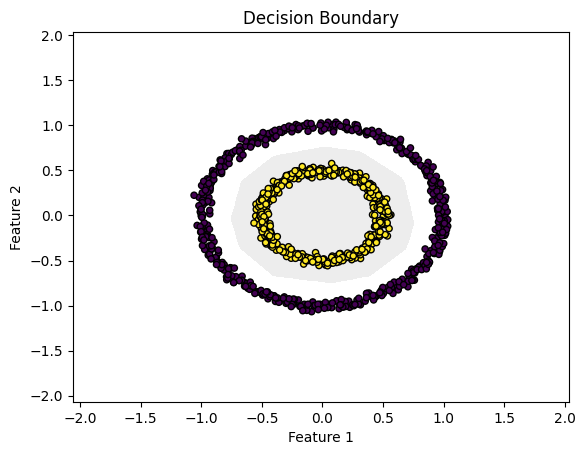

In [52]:
print(f"X shape: {X.shape}, y shape: {y.shape}")
plot_decision_boundary(model, X.cpu().numpy(), y.cpu().numpy())

In [55]:
model.eval()

CircleClassifier(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
  (activation): ReLU()
  (output_activation): Sigmoid()
)

CircleClassifier(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
  (activation): ReLU()
  (output_activation): Sigmoid()
)

In [54]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "circle_regression_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)



Saving model to: models\circle_regression_model_0.pth


In [57]:
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 5.8053, -5.7649],
                      [ 0.4292, -0.1678],
                      [-0.1929, -5.7677],
                      [-0.3568,  0.2156],
                      [ 0.1495, -0.1803],
                      [ 4.9066,  5.2694],
                      [-5.1165, -5.1982],
                      [ 5.8936,  0.2197],
                      [ 3.4535, -3.2641],
                      [-5.2043,  4.8882]])),
             ('layer_1.bias',
              tensor([-1.5311, -0.5133, -0.3546, -0.4830, -0.5999, -1.4756, -1.4845, -0.2851,
                       6.4035, -1.8092])),
             ('layer_2.weight',
              tensor([[-5.1990, -0.2949, -4.6562, -0.1053,  0.0494, -4.9362, -4.7474, -4.6660,
                        4.5732, -4.6017]])),
             ('layer_2.bias', tensor([3.0115]))])

In [58]:
weight = model.layer_1.weight
bias = model.layer_1.bias

weight , bias

(Parameter containing:
 tensor([[ 5.8053, -5.7649],
         [ 0.4292, -0.1678],
         [-0.1929, -5.7677],
         [-0.3568,  0.2156],
         [ 0.1495, -0.1803],
         [ 4.9066,  5.2694],
         [-5.1165, -5.1982],
         [ 5.8936,  0.2197],
         [ 3.4535, -3.2641],
         [-5.2043,  4.8882]], requires_grad=True),
 Parameter containing:
 tensor([-1.5311, -0.5133, -0.3546, -0.4830, -0.5999, -1.4756, -1.4845, -0.2851,
          6.4035, -1.8092], requires_grad=True))

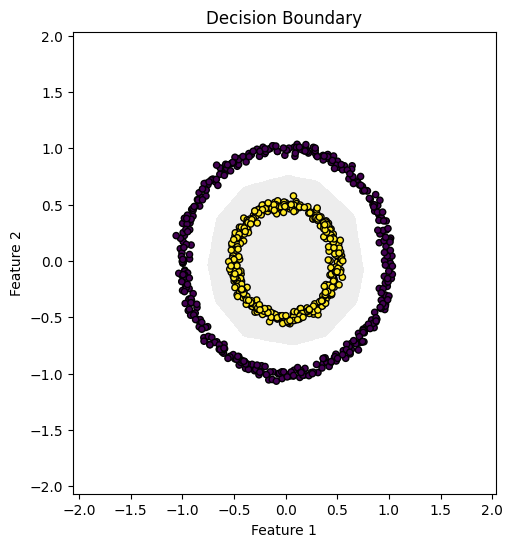

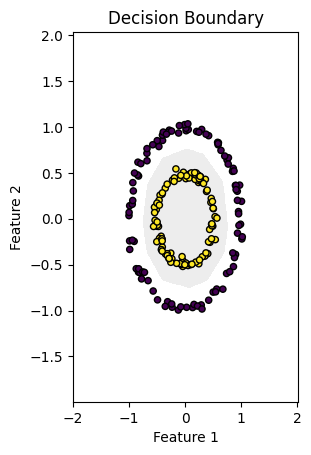

In [63]:

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)